# Projet numérique: câble sous-marin 

### Hugo TISSOT - Victor GAUTIER 

## I) Partie théorique 

#### Question 1

On utilise ici la méthode de Monte-Carlo pour estimer L*, la valabilité de cette dernière résulte de la loi forte des grands nombres.

Rappelons cette dernière :

Soit $(X_n)$ une suite de variables aléatoires indépendantes, de même lois, et intégrables
Alors la suite $(M_n)$ définie par

$M_n = \frac{X_1+.......+X_n}{n}$

converge vers $\mathbb{E}(X_n)$ presque sûrement et en moyenne quand n tend vers l'infini.

Dans le cadre de ce projet cette loi s'applique car chaque $l(k)$ pour tout k $\in \{1,...,K\}$ sont indépendantes de par l'indépendance de chaque simulation, suivent la même loi que la variable aléatoire $L|Z(x_{j1})=z(x_{j1}),....,Z(x_{jn}=z(x_{jn})$ et sont intégrables car bornés puisque $L$ est bornée.

Ainsi en supposant $K$ suffisament grand on sait que la moyenne des $l(k)$ sera une bonne estimation de $L*$ 

#### Question 2

On considérera d'une part les profondeurs des points pour lesquels on détient une mesure représentées par la variable aléatoire $Y = (Z(x_{j1}),..,Z(x_{jn}))$ et celles pour lesquels on ne détient aucune mesure, elles sont $N+1-n$ représentées par la variable aléatoire $X = (Z(x_i))$ pour $i \in \{0,...,N\}\setminus\{j_1,...,j_n\}$

L'ensemble des profondeurs des points est donc décrit par la variable aléatoire $Z = (X,Y)$ (Ordre des composantes différent de celui de l'énoncé)

En suivant donc la même méthode que celle présentée dans le paragraphe Vecteur Gaussiens à densité du polycopié IV de probabilité, on considère la matrice de covariance de $Z$ ci dessous :

\begin{pmatrix}
C_X & C_{X,Y} \\
C_{Y,X} & C_Y
\end{pmatrix}

où $C_X$ et $C_Y$ sont les matrices de covariance respectives de $X$ et $Y$ et $C_{X,Y} = Cov(X,Y) C_{Y,X} = Cov(Y,X)$

Ainsi la variable aléatoire $X|(Y=z)$ où $z = (z(x_{j1}),..,z(x_{jn}))$ suit une loi gausienne d'espérance 
$E = \mathbb{E}(X) + C_{X,Y}C_Y^{-1}(z-\mathbb{E}(Y))$ 

et de matrice de covariance $C_{X|Y=z} = C_X - C_{X,Y}C_Y^{-1}C_{Y,X}$




#### Question 3

Soit $A = (A_1,..,A_p)$ vecteur de composante gausienne indépendantes, toutes d'espérance nulle et de variance égale à 1, $R$ une matrice $p\times p$ et $m$ un vecteur de taille $p$

alors $B = m + RA$

est un vecteur aléatoire gaussien comme combinaison linéaire de vecteurs aléatoires gaussiens, d'espérance $m$ (par linéarité de l'espérance) et de matrice de covariance $C=RR^{T}$ 

#### Question 4

On a dans le cas pratique $Y=z$. Donc $Z=(X,z)$ (En s'accordant une liberté sur l'ordre des composantes du vecteur dans un premier temps)

On sait que la variable aléatoire d'intérêt à savoir $X|(Y=z)$ suit une loi gaussienne d'espérance $m$, vecteur de N+1-n composantes toutes égales à $\mu$ et de matrice de covariance $C_{X|(Y=z)}$ définie plus haut. On connait $\mu$ et $C_{X|(Y=z)}$ car on connait $C$ dans le cadre de ce problème.

On va alors réaliser une factorisation de Cholesky pour obtenir $R$ telle que $C_{X|(Y=z)} = RR^{T}$. On s'intéressera alors à la variable aléatoire $B = m + RA$ où $A$ sera une variable aléatoire suivant une loi normale centrée réduite que python peut simuler et on sait que B suit la même loi que $X|(Y=z)$ d'après la question précédente on peut donc dire que $Z=(B,z)$

Enfin on calcule les $l(k)$ pour plusieurs simulations donnant à priori un $B$ différent et donc un $Z$ différent et on moyenne ces longueurs simulées pour déterminer $L*$ (méthode de Monte-Carlo)

## II) Simulation numérique 


In [27]:
#Importation de modules
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics

In [28]:
#Discrétisation 
A=0 
B=500 
N=101 

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1) 
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5 
a = 50 
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100] 
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### 1. La fonction covariance 

In [29]:
# Cette fonction renvoie la matrice de covariance obtenue à partir d'une matrice de points  
def covariance(distance,a=50,sigma2=12):
    Cov=np.zeros(distance.shape)
    for i in range (distance.shape[0]):
        for j in range (distance.shape[1]):
            Cov[i][j]=sigma2*np.exp(-abs(distance[i][j])/a)     
    return Cov 
              

### 2. Calcul de la matrice de distance 

In [30]:
def mat_distance(lis_points1,lis_points2):#On prévoit le fait que la matrice de distance n'est pas nécessairement carrée
    l1=len(lis_points1)
    l2=len(lis_points2)
    Distance=np.zeros((l1,l2))
    for i in range(l1):
        for j in range(l2):
            Distance[i][j]=abs(lis_points1[i]-lis_points2[j])
    return Distance
                               

### 3. Calcul de la matrice de covariance du vecteur Z = ( Z($x_{0}$),...,Z($x_{N}$) )

In [31]:
covariance(mat_distance(discretization,discretization))

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

### 4. Extraction des matrices de covariance 

In [32]:
# entre les observations 
observation=np.array(observation_indexes)*Delta 
covariance(mat_distance(observation,observation))

array([[1.20000000e+01, 1.62402340e+00, 2.19787667e-01, 2.97450261e-02,
        4.02555153e-03, 5.44799157e-04],
       [1.62402340e+00, 1.20000000e+01, 1.62402340e+00, 2.19787667e-01,
        2.97450261e-02, 4.02555153e-03],
       [2.19787667e-01, 1.62402340e+00, 1.20000000e+01, 1.62402340e+00,
        2.19787667e-01, 2.97450261e-02],
       [2.97450261e-02, 2.19787667e-01, 1.62402340e+00, 1.20000000e+01,
        1.62402340e+00, 2.19787667e-01],
       [4.02555153e-03, 2.97450261e-02, 2.19787667e-01, 1.62402340e+00,
        1.20000000e+01, 1.62402340e+00],
       [5.44799157e-04, 4.02555153e-03, 2.97450261e-02, 2.19787667e-01,
        1.62402340e+00, 1.20000000e+01]])

In [33]:
# entre les inconnues 
unknown=np.array(unknown_indexes)*Delta 
covariance(mat_distance(unknown,unknown))

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
       ...,
       [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

In [34]:
# entre et les observations et les inconnues 
covariance(mat_distance(unknown,observation))

array([[1.08580490e+01, 1.79482343e+00, 2.42902937e-01, 3.28733378e-02,
        4.44892249e-03, 6.02096185e-04],
       [9.82476904e+00, 1.98358666e+00, 2.68449262e-01, 3.63306569e-02,
        4.91681975e-03, 6.65419193e-04],
       [8.88981865e+00, 2.19220229e+00, 2.96682318e-01, 4.01515855e-02,
        5.43392619e-03, 7.35401941e-04],
       [8.04384055e+00, 2.42275822e+00, 3.27884669e-01, 4.43743646e-02,
        6.00541720e-03, 8.12744838e-04],
       [7.27836792e+00, 2.67756192e+00, 3.62368601e-01, 4.90412573e-02,
        6.63701244e-03, 8.98221959e-04],
       [6.58573963e+00, 2.95916357e+00, 4.00479240e-01, 5.41989713e-02,
        7.33503313e-03, 9.92688787e-04],
       [5.95902365e+00, 3.27038152e+00, 4.42598009e-01, 5.98991269e-02,
        8.10646530e-03, 1.09709078e-03],
       [5.39194757e+00, 3.61433054e+00, 4.89146448e-01, 6.61987730e-02,
        8.95902970e-03, 1.21247282e-03],
       [4.87883592e+00, 3.99445300e+00, 5.40590429e-01, 7.31609588e-02,
        9.90125908e-03, 

### 5. Calcul de l’espérance conditionnelle des composantes non observées connaissant les observations 

$\text{On note } Inc \text{ (X dans la partie théorique)} \text{ le vecteur aléatoire des inconnues et } Obs \text{ (Y dans la partie théorique)} \text{ le vecteur aléatoire des observations.}\\
\text{D'après le cours, l'espérance conditionnelle de } Inc \text{ sachant } Obs \text{ est la variable aléatoire: }\\
\mathbb{E}(Inc|Obs)=\mathbb{E}(Inc)+Cov(Inc,Obs)\,Cov(Obs,Obs)^{-1}(Obs-\mathbb{E}(Obs))$

In [35]:
esp_obs=np.array([mu for k in range(len(observation_indexes))])
esp_inc=np.array([mu for k in range(len(unknown_indexes))])
cov_inc_obs=covariance(mat_distance(unknown,observation))
cov_obs=covariance(mat_distance(observation,observation))
obs=depth
# On utilise la formule précédente 
esp_inc_sachant_obs=esp_inc+cov_inc_obs.dot(np.linalg.inv(cov_obs)).dot(depth-esp_obs)
print(esp_inc_sachant_obs)

[ -0.46688335  -0.88839774  -1.26876184  -1.61178245  -1.92089264
  -2.19918609  -2.44944805  -2.67418323  -2.87564085  -3.05583718
  -3.21657567  -3.35946505  -3.4859354   -3.59725249  -3.69453041
  -3.77874275  -3.85073233  -3.91121966  -3.96081011  -4.31432093
  -4.62177936  -4.92545243  -5.2283794   -5.53359206  -5.8441451
  -6.16314662  -6.49378931  -6.83938234  -7.20338453  -7.58943893
  -8.00140931  -8.4434188   -8.91989118  -9.43559515  -9.99569205
 -10.60578751 -11.27198758 -12.00095981 -11.91810571 -11.10545015
 -10.35389999  -9.65593346  -9.00456508  -8.39327573  -7.81594742
  -7.26680206  -6.74034362  -6.23130312  -5.73458592  -5.2452207
  -4.75830973  -4.26897984  -3.77233366  -3.26340058  -2.73708703
  -2.18812549  -1.61102176  -1.43702815  -1.83839689  -2.20812324
  -2.54990754  -2.8671705   -3.16308739  -3.44061983  -3.70254547
  -3.95148576  -4.18993216  -4.42027113  -4.64480797  -4.86578994
  -5.08542869  -5.30592243  -5.52947795  -5.75833267  -5.99477703
  -6.2411774

In [36]:
print(len(esp_inc_sachant_obs))

95


On a bien N+1-n = 101+1-6 = 95 composantes pour l'espérance de ce vecteur aléatoire

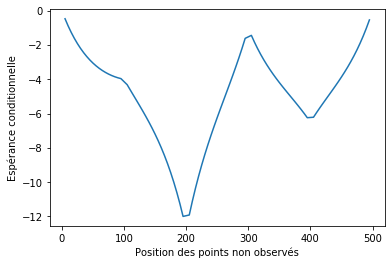

In [37]:
# Représentation graphique 
plt.plot(unknown,esp_inc_sachant_obs)
plt.xlabel('Position des points non observés')
plt.ylabel('Espérance conditionnelle')
plt.show()

### 6. Calcul de la matrice de variance conditionnelle 

$\text{D'après le cours, la matrice de variance conditionnelle de } Inc \text{ sachant } Obs \text { est : }\\
Var\,(Inc|Obs)=Cov(Inc,Inc) - Cov(Inc,Obs)\,Cov(Obs,Obs)^{-1}\,Cov(Obs,Inc)$

In [38]:
cov_obs_inc=covariance(mat_distance(observation,unknown))
cov_inc=covariance(mat_distance(unknown,unknown))
# Avec la formule précédente,on calcule la variance conditionnelle des points inconnus, 
var_inc_sachant_obs=cov_inc-cov_inc_obs.dot(np.linalg.inv(cov_obs)).dot(cov_obs_inc)
print(var_inc_sachant_obs)

[[ 2.16624554e+00  1.95016959e+00  1.75361159e+00 ...  6.50521303e-19
   1.51788304e-18  5.42101086e-19]
 [ 1.95016959e+00  3.91985713e+00  3.52477392e+00 ...  2.16840434e-19
   1.19262239e-18  1.40946282e-18]
 [ 1.75361159e+00  3.52477392e+00  5.33121337e+00 ... -8.67361738e-19
  -1.08420217e-19  2.16840434e-19]
 ...
 [ 1.08420217e-19 -2.16840434e-19 -1.08420217e-18 ...  5.33121337e+00
   3.52477392e+00  1.75361159e+00]
 [ 7.58941521e-19  4.33680869e-19 -4.33680869e-19 ...  3.52477392e+00
   3.91985713e+00  1.95016959e+00]
 [ 0.00000000e+00  9.75781955e-19  1.08420217e-19 ...  1.75361159e+00
   1.95016959e+00  2.16624554e+00]]


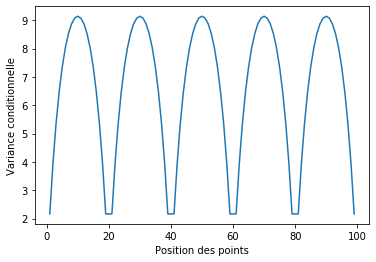

In [39]:
# Représentation de la diagonale en fonction de la position 
diagonale=np.array([var_inc_sachant_obs[i][i] for i in range(len(var_inc_sachant_obs))])
plt.plot(unknown_indexes, diagonale)
# On rajoute les points observés dont la variance conditionnelle est nulle, 
#var_tot=[(0 if i%20 == 0 else diagonale[i - (i//20 + 1)]) for i in range (N)]
plt.xlabel('Position des points')
plt.ylabel('Variance conditionnelle')
plt.show()

On remarque que plus un point, de profondeur inconnue, est éloigné d'un point, de profondeur connue, plus il est susceptible de prendre des valeurs très différentes (Ce seront ces points présentant de fortes variations de profondeur d'une simulation à l'autre qui seront en grande partie responsable des différences de longueur de câble pour chaque simulation)

### 7. Simulation conditionnelle 

In [40]:
# On utilse la méthode de Box-Muller 
def boxMuller():
    Y=np.zeros(len(unknown_indexes))
    U=np.zeros(len(unknown_indexes))
    V=np.zeros(len(unknown_indexes))
    m = np.array([mu for k in range (len(unknown_indexes))]) + cov_inc_obs.dot(np.linalg.inv(cov_obs).dot(depth - np.array([mu for k in range (len(observation_indexes))])))
    for k in range(len(unknown_indexes)):
        U[k] = (random.random()-random.random()+1)/2 # On veut générer un nombre aléatoire dans ]0,1[ et non [0,1[
        V[k] = (random.random()-random.random()+1)/2 
    Y = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
    R = np.linalg.cholesky(var_inc_sachant_obs)
    Z =  (m + R.dot(Y)).tolist()
    Z_simulation = [0] + Z[0:19] + [-4] + Z[19:38] + [-12.8] + Z[38:57] + [-1] + Z[57:76] + [-6.5] + Z[76:95] + [0]
    return Z_simulation 


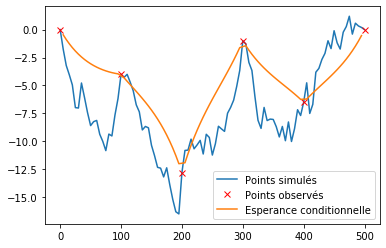

In [41]:
# Représentation graphique 
plt.plot(discretization, boxMuller(), label="Points simulés")
plt.plot(observation, depth, 'rx', label='Points observés')
plt.plot(unknown,esp_inc_sachant_obs, label='Esperance conditionnelle')
plt.legend()
plt.show()

On s'aperçoit de l'irrégularité du fond marin. 
Les points au voisinage des points observés ont davantage tendance à se rapprocher de l'éspérance de la variable aléatoire conditionnelle

### 8. Calcul de la longueur du câble 

In [42]:
def long_cable(vect_profondeur, pas) :
    L = 0
    
    for i in range(1,len(vect_profondeur)) :
        L += np.sqrt(pas**2 + (vect_profondeur[i] - vect_profondeur[i-1])**2)
    return L

### 9. Calcul longueur de câble pour 100 simulations 

In [43]:
longueurs_sans_esp = []
longueurs_avec_esp = []
for i in range(100):
    l_sans_esp = long_cable(boxMuller(),Delta) #Longueur de cable pour une simulation en travaillant à partir de la liste des 101 profondeurs
    longueurs_sans_esp.append(l_sans_esp)
    
    l_avec_esp = long_cable(esp_inc_sachant_obs,Delta) #Longueur de cable pour le fond marin "lissé" après être passé par l'espérance des points 
    longueurs_avec_esp.append(l_avec_esp)
print(f"L'espérance conditionnelle (estimée) de la longueur vaut: {sum(longueurs_sans_esp)/100}")


print(f"La longueur de l'espérance conditionnelle vaut:{sum(longueurs_avec_esp)/100}")


L'espérance conditionnelle (estimée) de la longueur vaut: 517.6600607191641
La longueur de l'espérance conditionnelle vaut:471.3909239994677


On remarque que la longueur moyenne de l'espérance conditionnelle est plus petite que l'espérance conditionnelle de la longueur (obtenue en moyennant les longueurs des  simulations). En effet en passant par l'espérance conditionnelle avant de calculer la longueur, on "lisse" le fond marin. De cette perte d'information résulte une sous-estimation de la longueur réelle de câble nécessaire que l'on doit en réalité estimer prenant en compte l'irrégularité du fond marin.

### 10. Représentation de la suite $M_{n}$ des moyennes des longueurs de câble 

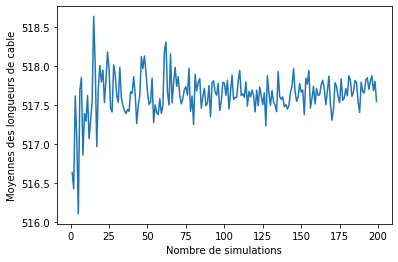

In [44]:
def rep_M(n):
    les_moy=[]
    les_simul=np.arange(1,n)
    for p in range(1,n):
        longueurs=[]
        for i in range(p):
            l=long_cable(boxMuller(),Delta)
            longueurs.append(l)
        les_moy.append(sum(longueurs)/p)

    plt.plot(les_simul,les_moy)
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Moyennes des longueurs de cable")
    plt.show()

rep_M(200)    

On remarque que plus le nombre de simulation est grand et moins la longueur de cable moyenne à tendance à fluctuer. En effet cette dernière tend vers l'espérance de la longueur de câble sachant les profondeurs des points observés d'après la loi forte des grands nombres. Cette valeur semble se situer entre 517.5 et 518.5.

### 11. Histogramme des longueurs de câble

In [45]:
def simul(n): #Fonction donnant une liste comprennant les longueurs de n simulations différentes
    longueurs = []
    for i in range(n) :
        longueurs.append(long_cable(boxMuller(),Delta))
    return longueurs

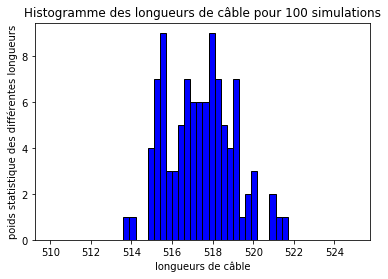

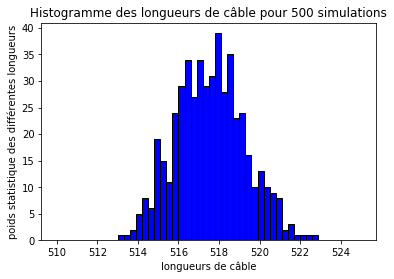

In [46]:
def histogramme(n) :
    longueurs = simul(n)
    plt.hist(longueurs,bins = 50, range = (510,525), color = "blue", edgecolor = "black")
    plt.title("Histogramme des longueurs de câble pour " + str(n) + " simulations")
    plt.xlabel("longueurs de câble")
    plt.ylabel("poids statistique des différentes longueurs")
    plt.show()
    
    
histogramme(100)
histogramme(500)

### 12. Intervalle de confiance à 95%

#### 1ère Méthode : Approximation Gaussienne
On sait théoriquement que la distribution des longueurs de câble pour n simulations suit une loi normale d'espérance $\lambda$ et d'écart type $\sigma_n = \frac{\sqrt{\sum_{i=1}^n (l(i)-\lambda)^{2}}}{\sqrt{n}}$ où $l(i)$ est la longueur de câble de la ième simulation.

On peut donc estimer un intervalle de confiance à 95% : [$\mathbb{E}(L)-2\sigma_n$,$\mathbb{E}(L)+2\sigma_n$] en disant en pratique que $\lambda$ est égale à la moyenne des longueurs de câbles obtenues après n simulations 

In [47]:
def intervalle_95_1(n) :
    longueurs = simul(n)
    D = 0 #Représentera la somme dans l'expression de l'écart type
    lamb = statistics.mean(longueurs)
    for j in range(len(longueurs)) :
        D += (longueurs[j]-lamb)**2
    sigma_n = np.sqrt(D)/np.sqrt(n)
    return [lamb - 2*sigma_n, lamb + 2*sigma_n]

print("Un intervalle de confiance à 95% de la longueur de câble nécessaire après 100 simulations est : " + str(intervalle_95_1(100)))

Un intervalle de confiance à 95% de la longueur de câble nécessaire après 100 simulations est : [514.3089613687167, 521.5187262739338]


#### 2ème méthode : Considérer seulement 95% des résultats cohérents entre eux (ie proche de la moyenne)

On réalise un grand nombre de simulation et on ne considère les résultats que des 95% des simulations donnant une valeur proche de la moyenne des longueurs de toutes les simulations. On détermine ensuite le plus petit intervalle comprennant l'ensemble des valeurs données par cette échantillon amoindri de simulations.

In [48]:
def intervalle_95_2(n) :
    longueurs = simul(n)
    diff_moy = [] #Liste des différences des valeurs de longueur des simulation par rapport à leur moyenne

    lamb = statistics.mean(longueurs)
    
    for i in range(n) : #Boucle pour remplir diff_moy
        diff_moy.append(abs(lamb-longueurs[i])) 
    
    nb_suppr = int(n*0.05)+1  #Nombre de résultats de simulation à supprimer pour en garder moins de 95%
    for j in range (nb_suppr) : #On supprime les résultats trop éloignés de la moyenne
        diff_moy.remove(max(diff_moy))
    return [lamb-max(diff_moy),lamb+max(diff_moy)]
        
print("Un intervalle de confiance à 95% de la longueur de câble nécessaire après 100 simulations est : " + str(intervalle_95_2(100)))     

Un intervalle de confiance à 95% de la longueur de câble nécessaire après 100 simulations est : [514.8433331460411, 520.7099428246269]


### 13. Probabilité que le câble dépasse 525 mètres

Ici encore on a 2 possibilités : 

> Revenir à la théorie en exploitant la densité de la loi normale décrivant la distribution des longueurs.

> Supposer que le nombre de simulations est assez grand pour assimiler la proportion des simulations donnant un longueur supérieure à 525 mètres à la probabilité de la réalisation de cette événement.

Nous proposons d'adopter ici la seconde possibilité plus simple à implémenter

In [67]:
def prob_sup525(n) :
    longueurs = simul(n)
    c = 0
    for x in longueurs :
        if x > 525 :
            c = c+1
    return c/n

print("La probabilité que la longueur de cable soit supérieure à 525 mètres est : " + str(prob_sup525(100)))

La probabilité que la longueur de cable soit supérieure à 525 mètres est : 0.0


Note : Pour 100 simulations cette probabilité est presque toujours égale à 0

### 14. 1 000, 10 000, 100 000 simulations

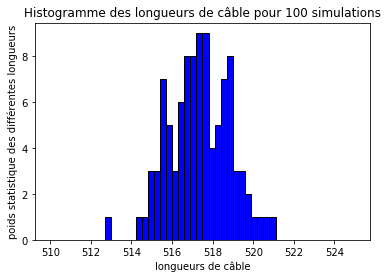

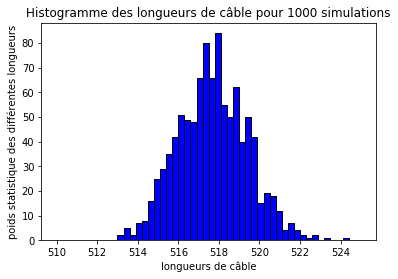

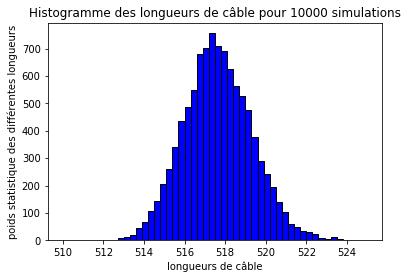

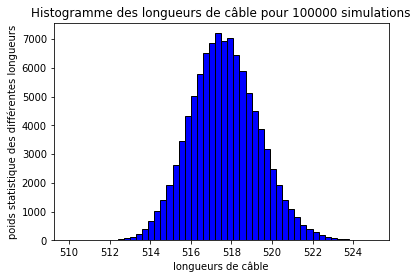

In [68]:
nb_simu = [100,1000,10000,100000]
for x in nb_simu :
    histogramme(x)


On observe bien une distribution des longueurs épousant de mieux en mieux une loi gaussienne quand le nombre de simulation augmente

In [69]:
for x in nb_simu :
    print("Intervalles de confiance à 95% pour " + str(x) + " simulations \nMéthode 1 : " +str(intervalle_95_1(x)) + "\nMéthode 2 : " +str(intervalle_95_2(x)))

Intervalles de confiance à 95% pour 100 simulations 
Méthode 1 : [514.0811809383645, 521.2560661916709]
Méthode 2 : [514.1983714836684, 520.8369864477044]
Intervalles de confiance à 95% pour 1000 simulations 
Méthode 1 : [514.1605855962424, 521.0779459677802]
Méthode 2 : [514.2691023732651, 521.0040074607663]
Intervalles de confiance à 95% pour 10000 simulations 
Méthode 1 : [514.2625924382659, 521.0374207462377]
Méthode 2 : [514.4014179200416, 520.9617081437192]
Intervalles de confiance à 95% pour 100000 simulations 
Méthode 1 : [514.2807501509398, 521.0317212042645]
Méthode 2 : [514.3506710025077, 520.9427563757428]


On voit que les intervalles de confiance donnés par les 2 méthodes tend à devenir les même quand le nombre de simulation augmente (environ [514.31,520.97]), en effet la distribution des longueurs est de mieux en mieux modélisée par une gaussienne.

In [70]:
for x in nb_simu :
    print("La probabilité que le câble fasse plus de 525 mètres après " + str(x) + " est: \n" + str(prob_sup525(x)))

La probabilité que le câble fasse plus de 525 mètres après 100 est: 
0.0
La probabilité que le câble fasse plus de 525 mètres après 1000 est: 
0.0
La probabilité que le câble fasse plus de 525 mètres après 10000 est: 
0.0001
La probabilité que le câble fasse plus de 525 mètres après 100000 est: 
3e-05


Quand le nombre de simulation devient suffisament grand on s'aperçoit que la probabilité que le câble fasse plus de 525 mètres n'est pas de 0 mais plutôt de $10^{-4}$  (celà reste donc très fortement peu probable)